In [1]:
! pip install psycopg2-binary

import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.4 MB/s eta 0:00:00


In [2]:
#Init de la connexion à la db
conn = ps.connect(
    host="54.36.191.217",
    port="5432",
    dbname="postgres",
    user="postgres",
    password="epsi-test-abc")

In [3]:
# Fetch des datas
pdf = sqlio.read_sql_query("SELECT fk_annee, taux_population from mspr_ia.fait_taux", conn)
pdf = pdf.rename(columns={"fk_annee":"annees"})
pdf

<ipython-input-3-ec8a49de8ac1>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pdf = sqlio.read_sql_query("SELECT fk_annee, taux_population from mspr_ia.fait_taux", conn)


annees  taux_population
0     2023       32306916.0
1     2022       32308258.0
2     2021       32312572.0
3     2020       32303266.0
4     2019       32356902.0
..     ...              ...
73    1950       22327886.0
74    1949       22231180.0
75    1948       22114366.0
76    1947       21969726.0
77    1946       21848568.0

[78 rows x 2 columns]

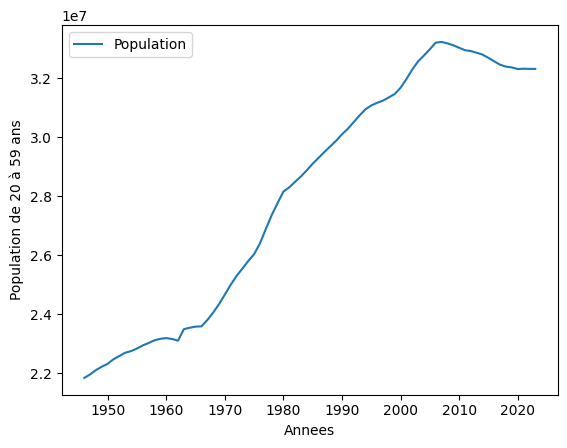

In [4]:
#Visualisation du df

x_data = pdf.annees
y_data = pdf.taux_population

fig, ax = plt.subplots()
ax.plot(x_data, y_data, label='Population')
ax.set_xlabel('Annees')
ax.set_ylabel('Population de 20 à 59 ans')
ax.legend()
plt.show()

In [6]:
# Le taux de population est en constante croissance cependant on contate un pique atteint en 2007 suivie d'une faible chutte.

In [8]:
#Analyse statistique du dataset
pdf.describe()

annees  taux_population
count    78.000000     7.800000e+01
mean   1984.500000     2.813696e+07
std      22.660538     4.061115e+06
min    1946.000000     2.184857e+07
25%    1965.250000     2.358714e+07
50%    1984.500000     2.898838e+07
75%    2003.750000     3.230600e+07
max    2023.000000     3.321998e+07

In [9]:
# Regression linéaire pour afin de mettre en relation le taux de population

# Recuperation du nombre de vote par annee du premier parti de notre echantillon

nb_votes_com = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'COM' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)

nb_votes_com

<ipython-input-9-59549088a546>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nb_votes_com = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'COM' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)


annees  nb_total_vote partis
0     1958          90429    COM
1     1962          89129    COM
2     1967         119713    COM
3     1973         112165    COM
4     1978         122020    COM
5     1981          74453    COM
6     1988          54271    COM
7     1993          43948    COM
8     1997          54502    COM
9     2002          17170    COM
10    2007          25175    COM
11    2012            290    COM
12    2017          83259    COM
13    2022          83259    COM

In [10]:
# Jointure des deux dataframes
final_pdf_com = pd.merge(pdf, nb_votes_com, on="annees")
final_pdf_com

annees  taux_population  nb_total_vote partis
0     2022       32308258.0          83259    COM
1     2017       32448508.0          83259    COM
2     2012       32910610.0            290    COM
3     2007       33219984.0          25175    COM
4     2002       32288026.0          17170    COM
5     1997       31232352.0          54502    COM
6     1993       30730776.0          43948    COM
7     1988       29685168.0          54271    COM
8     1981       28299332.0          74453    COM
9     1978       27358708.0         122020    COM
10    1973       25551204.0         112165    COM
11    1967       23807132.0         119713    COM
12    1962       23108534.0          89129    COM
13    1958       23122838.0          90429    COM

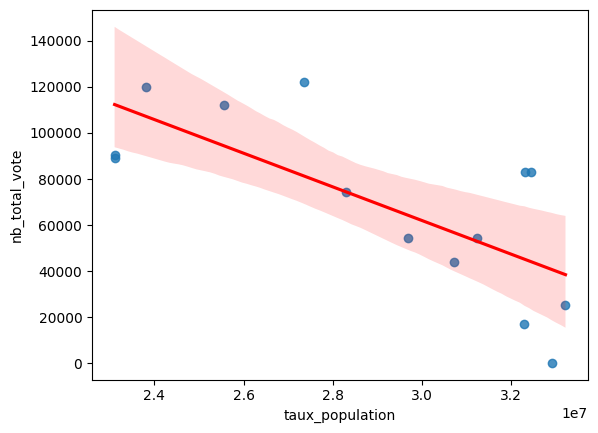

In [11]:
# Regression linéaire entre les depenses et les votes:

ax = sns.regplot(x="taux_population",y="nb_total_vote", data=final_pdf_com, line_kws={"color": "red"})

In [12]:
# On peut constater ici une correlation entre notre variable Y (nombre de votes) et le taux de population sur le partie des communistes
# Le nombre de vote communiste baisse avec l'augmentation de la population.

# Selection d'un autre parti

nb_votes_exd = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'EXD' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)

nb_votes_exd

<ipython-input-12-2c0fa78893cf>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nb_votes_exd = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'EXD' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)


annees  nb_total_vote partis
0     1958           1621    EXD
1     1962              0    EXD
2     1967              0    EXD
3     1973           3880    EXD
4     1978           5760    EXD
5     1981           2981    EXD
6     1988            310    EXD
7     1993           1040    EXD
8     1997           2222    EXD
9     2002           7387    EXD
10    2007           1519    EXD
11    2017           1764    EXD
12    2022           1764    EXD

In [13]:
# Jointure des deux dataframes
final_pdf_exd = pd.merge(pdf, nb_votes_exd, on="annees")
final_pdf_exd

annees  taux_population  nb_total_vote partis
0     2022       32308258.0           1764    EXD
1     2017       32448508.0           1764    EXD
2     2007       33219984.0           1519    EXD
3     2002       32288026.0           7387    EXD
4     1997       31232352.0           2222    EXD
5     1993       30730776.0           1040    EXD
6     1988       29685168.0            310    EXD
7     1981       28299332.0           2981    EXD
8     1978       27358708.0           5760    EXD
9     1973       25551204.0           3880    EXD
10    1967       23807132.0              0    EXD
11    1962       23108534.0              0    EXD
12    1958       23122838.0           1621    EXD

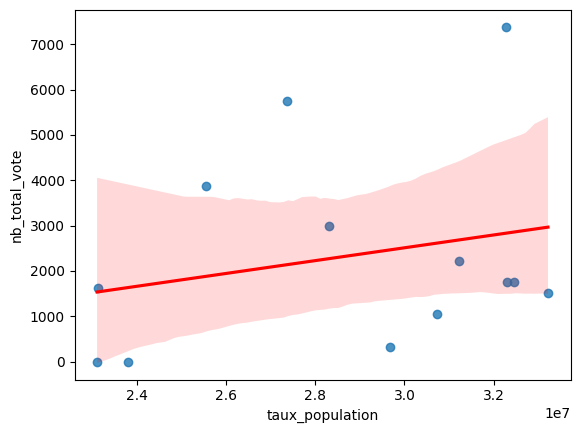

In [14]:
ax = sns.regplot(x="taux_population",y="nb_total_vote", data=final_pdf_exd, line_kws={"color": "red"})

In [15]:
# Dans le cas de l'extreme droite à l'inverse, la corrélation est innexistante entre nos Y et nos données de taux de population

# Passons à l'analyse pour les partis DIV

nb_votes_div = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'DIV' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)
nb_votes_div

<ipython-input-15-9568452ddb80>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nb_votes_div = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'DIV' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)


annees  nb_total_vote partis
0    1958           2235    DIV
1    1962           1121    DIV
2    1967              0    DIV
3    1993          16243    DIV
4    1997           6029    DIV
5    2002          16452    DIV
6    2007           3800    DIV
7    2012           1875    DIV
8    2017          57480    DIV
9    2022          57480    DIV

In [16]:
final_pdf_div = pd.merge(pdf, nb_votes_div, on="annees")
final_pdf_div

annees  taux_population  nb_total_vote partis
0    2022       32308258.0          57480    DIV
1    2017       32448508.0          57480    DIV
2    2012       32910610.0           1875    DIV
3    2007       33219984.0           3800    DIV
4    2002       32288026.0          16452    DIV
5    1997       31232352.0           6029    DIV
6    1993       30730776.0          16243    DIV
7    1967       23807132.0              0    DIV
8    1962       23108534.0           1121    DIV
9    1958       23122838.0           2235    DIV

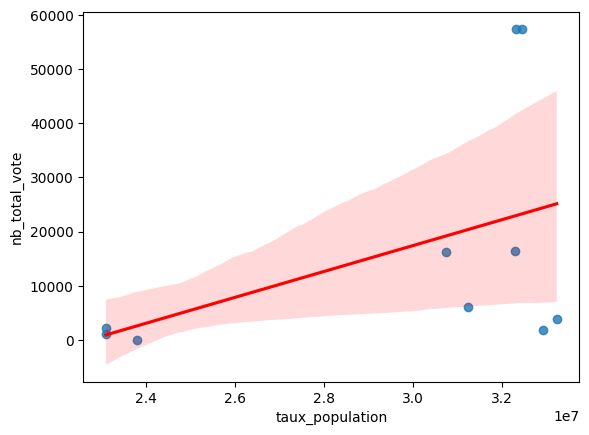

In [17]:
ax = sns.regplot(x="taux_population",y="nb_total_vote", data=final_pdf_div, line_kws={"color": "red"})


In [19]:
# Dans le cas de l'extreme droite à l'inverse, la corrélation est innexistante entre nos Y et nos données de
# dépenses et recettes

# Passons à l'analyse pour les partis LR

nb_votes_div = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'FRN' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)
nb_votes_div

<ipython-input-19-ac0eac0f7958>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nb_votes_div = sqlio.read_sql_query("select \"FK_ANNEE\" as \"annees\", sum(nombre_de_votes) as \"nb_total_vote\", \"FK_PARTI\" as \"partis\" from mspr_ia.fait_vote where \"FK_PARTI\" = 'FRN' group by \"FK_PARTI\", \"FK_ANNEE\" order by \"FK_ANNEE\"", conn)


annees  nb_total_vote partis
0    1981            646    FRN
1    1988          49331    FRN
2    1993          63242    FRN
3    1997          75193    FRN
4    2002          64424    FRN
5    2007          28011    FRN
6    2012          66075    FRN

In [20]:
final_pdf_div = pd.merge(pdf, nb_votes_div, on="annees")
final_pdf_div

annees  taux_population  nb_total_vote partis
0    2012       32910610.0          66075    FRN
1    2007       33219984.0          28011    FRN
2    2002       32288026.0          64424    FRN
3    1997       31232352.0          75193    FRN
4    1993       30730776.0          63242    FRN
5    1988       29685168.0          49331    FRN
6    1981       28299332.0            646    FRN

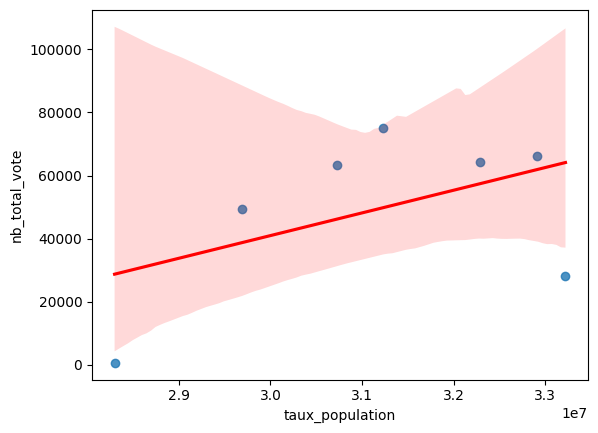

In [21]:
ax = sns.regplot(x="taux_population",y="nb_total_vote", data=final_pdf_div, line_kws={"color": "red"})


In [ ]:
#